*Antoine de Marassé* https://github.com/antoinedme
(Training and learning linear r)

## Linear Regression Example

https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

This example uses the only the first feature of the `diabetes` dataset, in order to illustrate a two-dimensional plot of this regression technique. The straight line can be seen in the plot, showing how linear regression attempts to draw a straight line that will best minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation. The coefficients, the residual sum of squares and the coefficient of determination are also calculated.

Note: The `diabetes` dataset is from the "Least Angle Regression", B. Efron, T. Hastie, I. Johnstone and R. Tibshirani, Statistics Department, Stanford University, January 9, 2003
http://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf
Diabetes study. 442 diabetes patients were measured on 10 baseline variable (AGE, SEX, BMI, BP, ··· Serum Measurements···, Response). The dataset has been normalized since and the variables value can't be recognised.


In [1]:
%matplotlib inline

In [2]:
print(__doc__)

# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

Automatically created module for IPython interactive environment


In [3]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
print(type(diabetes_X))

# Overview of dataset properties
print('Dimension of array: ', diabetes_X.ndim, '\nSize of array: ', diabetes_X.size)
print('Preview of array: ')

# Preview numpy array, 10 items (similar to pandas head)
diabetes_X[:5]

<class 'numpy.ndarray'>
Dimension of array:  2 
Size of array:  4420
Preview of array: 


array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665645,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02269202, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187235,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03199144, -0.04664087]])

In [4]:
# Use only one feature (select column 3)
diabetes_X = diabetes_X[:, np.newaxis, 2]

print('Dimension of array: ', diabetes_X.ndim, '\nSize of array: ', diabetes_X.size)
diabetes_X[:5]

Dimension of array:  2 
Size of array:  442


array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469]])

In [5]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-200]
diabetes_X_test = diabetes_X[-200:]
diabetes_X_train
print('Size of data test array: ', diabetes_X_test.size)
print('Size of data train array: ', diabetes_X_train.size)

Size of data test array:  200
Size of data train array:  242


In [6]:
# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-200]
diabetes_y_test = diabetes_y[-200:]

print('Size of target test array: ', diabetes_y_test.size)
print('Size of target train array: ', diabetes_y_train.size)

Size of target test array:  200
Size of target train array:  242


In [7]:
# Create linear regression object: LinearRegression fits a linear model with coefficients 
# w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, 
# and the targets predicted by the linear approximation.
regr = linear_model.LinearRegression()

In [8]:
# Train the model using the training sets fit(self, X, y, sample_weight=None)
# Parameters: X: Training data, y: Target values. Will be cast to X’s dtype if necessary, sample_weight: ndividual weights for each sample
# Returns self: returns an instance of self.
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

In [10]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))

# The coefficient of determination: 1 is perfect prediction
# The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). 
# The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). 
# A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [927.11987755]
Mean squared error: 3845.03
Coefficient of determination: 0.38


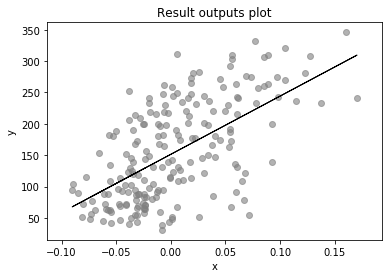

In [17]:

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='grey', alpha=0.6)
plt.plot(diabetes_X_test, diabetes_y_pred, color='black', linewidth=1)
plt.title('Result outputs plot')
plt.xlabel('x')
plt.ylabel('y')

plt.show()